In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import datetime as dt
%cd

C:\Users\Sai


In [4]:
customer=pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\CUSTOMERS.csv')
seller=pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\SELLERS.csv')
product=pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\PRODUCTS.csv')
order =pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDERS.csv')
geo=pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\GEO_LOCATION.csv')
order_payment=pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_PAYMENTS.csv')
rating=pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv')
items=pd.read_csv(r'Desktop\notes\sowmiya\Python\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_ITEMS.csv')

In [5]:
a=pd.merge(customer,geo,how='inner',left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix').drop(columns='geolocation_zip_code_prefix')
b=pd.merge(a,order,how='inner')
c=pd.merge(b,items,how='inner')
d=pd.merge(c,seller,how='inner')
e=pd.merge(d,product,how='inner')
f=pd.merge(e,order_payment,how='inner')
df=pd.merge(f,rating,how='inner')

In [6]:
#converting object to datetime

df['review_creation_date']=pd.to_datetime(df.review_creation_date,format='%m/%d/%Y %H:%M')
df['order_delivered_carrier_date']=pd.to_datetime(df.order_delivered_carrier_date,format='%m/%d/%Y %H:%M')
df['order_delivered_customer_date']=pd.to_datetime(df.order_delivered_customer_date,format='%m/%d/%Y %H:%M')
df['order_estimated_delivery_date']=pd.to_datetime(df.order_estimated_delivery_date,format='%m/%d/%Y %H:%M')
df['shipping_limit_date']=pd.to_datetime(df.shipping_limit_date,format='%m/%d/%Y %H:%M')
df['order_purchase_timestamp']=pd.to_datetime(df.order_purchase_timestamp,format='%m/%d/%Y %H:%M')



In [7]:
def missing_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x = x.fillna(x.median())
    elif (x.dtype == 'object'):
        x = x.fillna(x.mode()[0])
    else:
        x
    return(x)

df=df.apply(missing_treat)

1. Perform Detailed exploratory analysis
a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…

In [54]:
#df['revenue']=df['order_item_id']*df['price']
print('Total Revenue',df.revenue.sum())
print('Total Quantity',df.order_id.nunique())
print('Total Product',df.product_id.nunique())
print('Total Category',df.product_category_name.nunique())
print('Total Sellers',df.seller_id.nunique())
print('Total Location',df.customer_zip_code_prefix.nunique())
print('Total payment Method',df.payment_type.nunique())

Total Revenue 16113590.140000002
Total Quantity 98391
Total Product 32904
Total Category 71
Total Sellers 3095
Total Location 14820
Total payment Method 4


b.Understanding how many new customers acquired every month

In [55]:
df["month_year"]=df["order_purchase_timestamp"].dt.to_period('M') 
x=pd.crosstab(df.month_year,df.customer_id)
x.sum(axis=1)

month_year
2016-09       3
2016-10     386
2016-12       1
2017-01    1023
2017-02    2072
2017-03    3193
2017-04    2858
2017-05    4433
2017-06    3804
2017-07    4877
2017-08    5205
2017-09    5125
2017-10    5603
2017-11    9069
2017-12    6576
2018-01    8588
2018-02    7998
2018-03    8569
2018-04    8251
2018-05    8208
2018-06    7376
2018-07    7337
2018-08    7442
2018-09       1
Freq: M, dtype: int64

c. Understand the retention of customers on month on month basis

In [56]:

df["customer_id"].nunique()

#when we do nunique for customer_id in order table.the unique value is same as the number of rows in customer_id.so their is zero retension of customers.

98391

Understand the trends/seasonality of sales, quantity by category, location, month, 
week, day, time, channel, payment method etc…




<AxesSubplot:xlabel='product_category_name'>

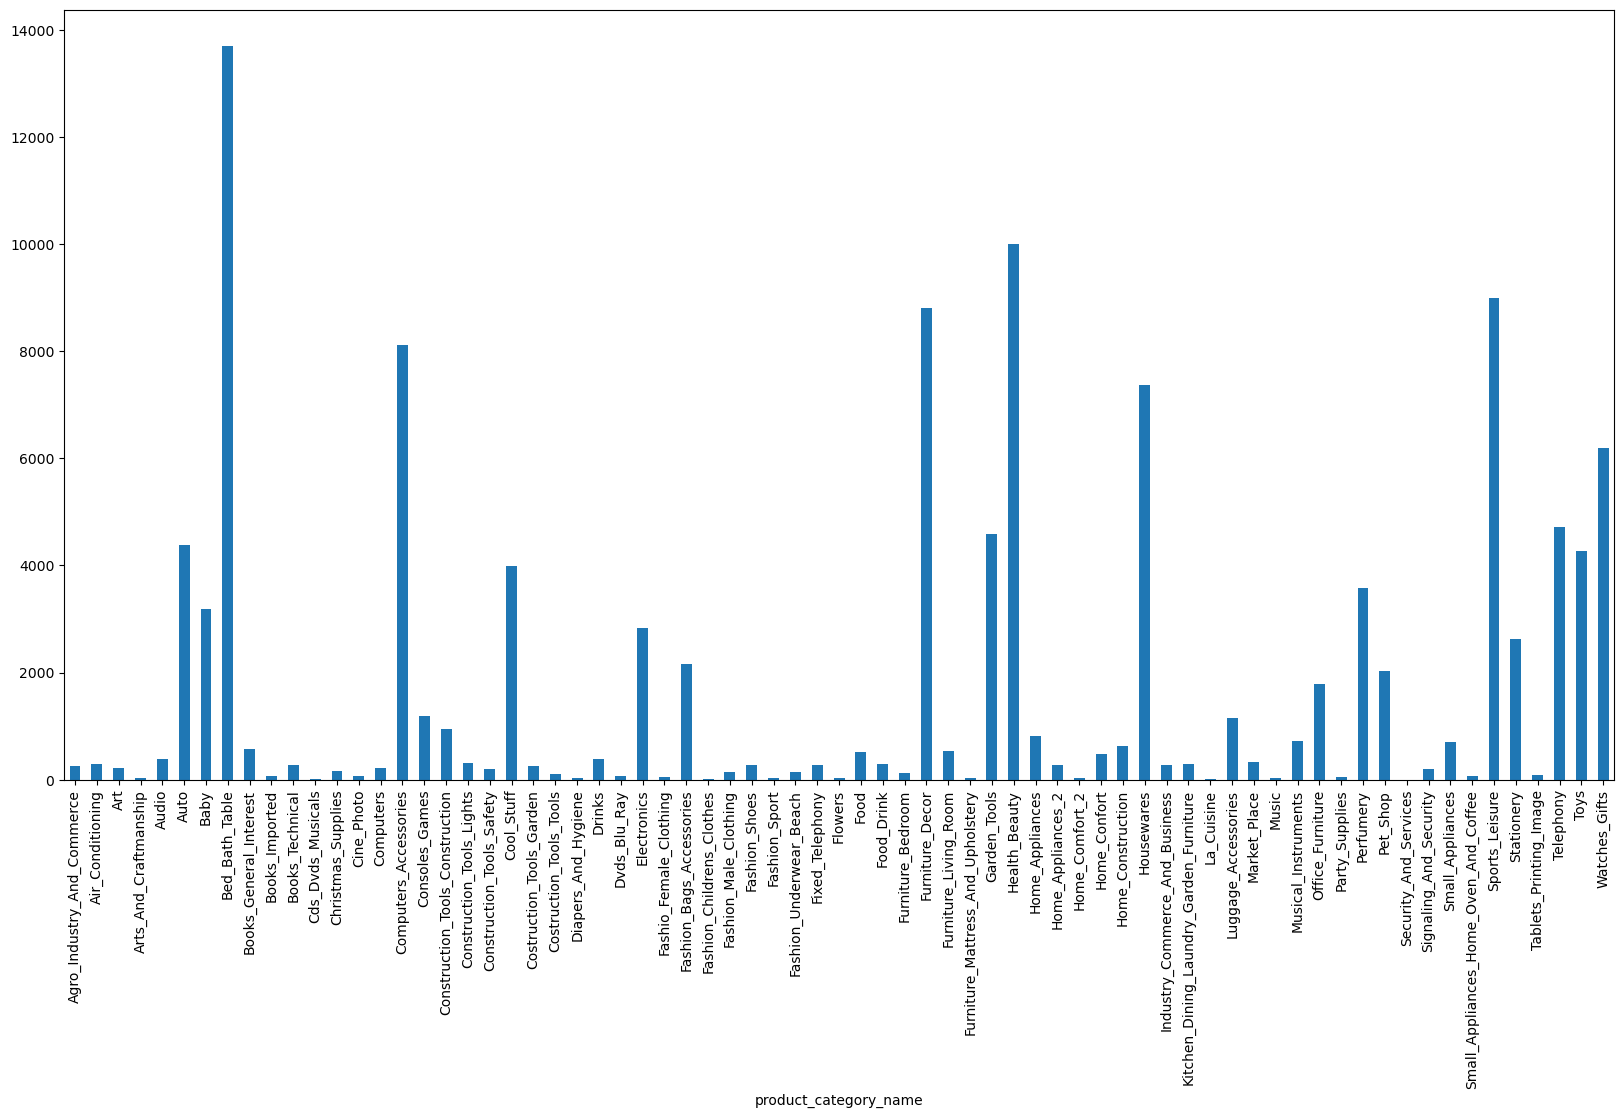

In [58]:
#trend by category
df.groupby('product_category_name')['order_id'].count().plot(kind='bar',figsize=(20,10))

<AxesSubplot:ylabel='customer_state'>

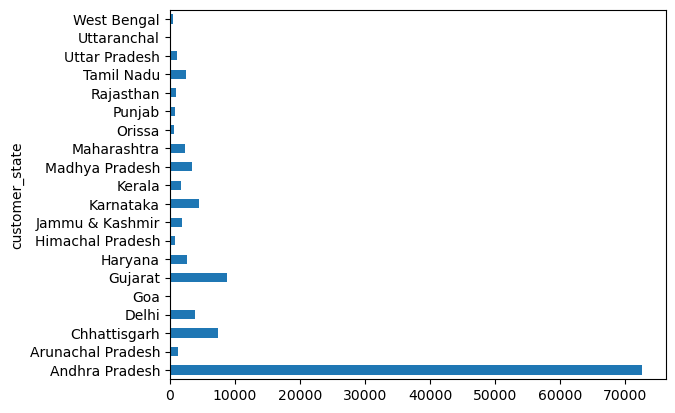

In [17]:
#trend by location
df.groupby('customer_state')['order_id'].count().plot(kind='barh')

<AxesSubplot:xlabel='month_year'>

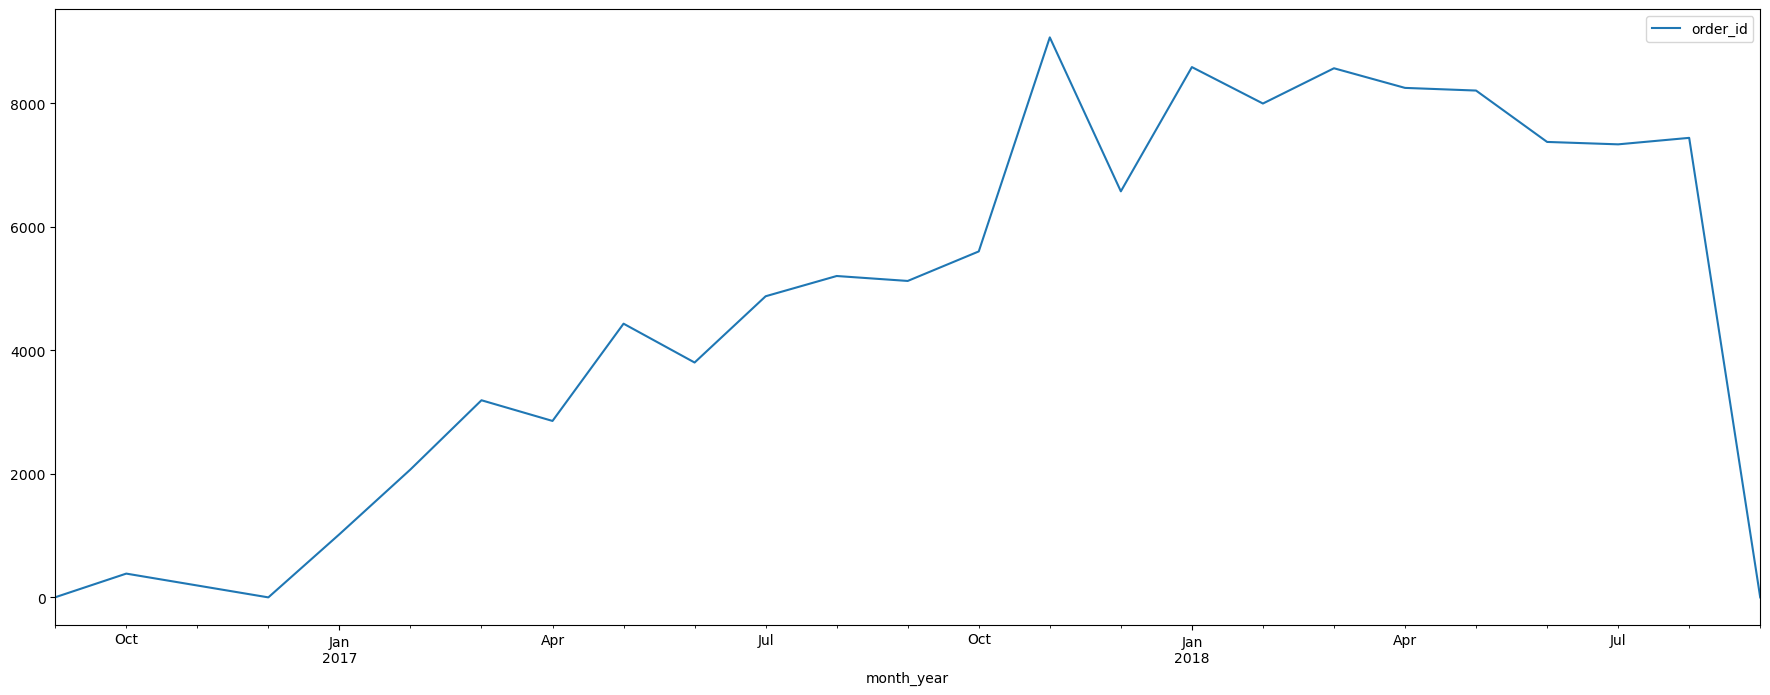

In [18]:
#tred by month
df.groupby(by="month_year")[["order_id"]].count().plot(kind="line",figsize=(22,8))

array([<AxesSubplot:ylabel='order_id'>], dtype=object)

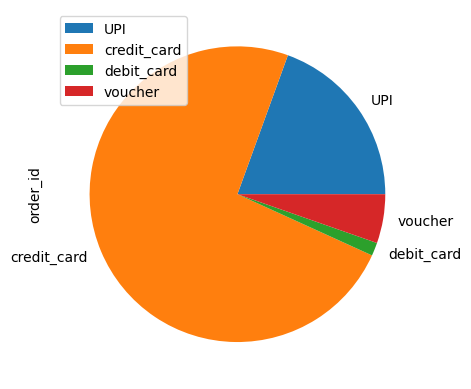

In [19]:
#payment type
df.groupby(by="payment_type")[["order_id"]].count().plot(kind="pie",subplots=True)

f. Popular Products by month, seller, state, category

In [20]:
#by month
df.groupby(['month_year',df.product_id.rename('product')])['product_id'].count().reset_index().sort_values(by=['month_year','product_id'],ascending=[True,False]).drop_duplicates(subset='month_year').reset_index().drop(columns='index')


,month_year,product,product_id
0,2016-09,c1488892604e4ba5cff5b4eb4d595400,1
1,2016-10,eba7488e1c67729f045ab43fac426f2e,11
2,2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
3,2017-01,985c412b0ac92ed9d8a76bbeab6d44eb,16
4,2017-02,42fffc68ff7e8176f11baaf4a4227557,13
5,2017-03,7e0dc102074f8285580c9777f79c90cf,45
6,2017-04,99a4788cb24856965c36a24e339b6058,40
7,2017-05,99a4788cb24856965c36a24e339b6058,66
8,2017-06,42a2c92a0979a949ca4ea89ec5c7b934,72
9,2017-07,f1c7f353075ce59d8a6f3cf58f419c9c,63


In [21]:
#by state
df.groupby(['customer_state',df.product_id.rename('product')])['product_id'].count().reset_index().sort_values(by=['customer_state','product_id'],ascending=[True,False]).drop_duplicates(subset='customer_state').reset_index().drop(columns='index')



,customer_state,product,product_id
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,344
1,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
2,Chhattisgarh,422879e10f46682990de24d770e7f83d,42
3,Delhi,53759a2ecddad2bb87a079a1f1519f73,25
4,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
5,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,52
6,Haryana,35afc973633aaeb6b877ff57b2793310,17
7,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
8,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
9,Karnataka,422879e10f46682990de24d770e7f83d,25


In [22]:
#by seller
df.groupby(['seller_id',df.product_id.rename('product')])['product_id'].count().reset_index().sort_values(by=['seller_id','product_id'],ascending=[True,False]).drop_duplicates(subset='seller_id').reset_index().drop(columns='index')


,seller_id,product,product_id
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,115
2,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
3,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
4,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
3092,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
3093,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [23]:
#by categry
df.groupby('product_category_name')['product_id'].count().sort_values(ascending=False).head(1)

product_category_name
Bed_Bath_Table    13690
Name: product_id, dtype: int64

Popular categories by state, month

In [25]:
#by state
df.groupby(['customer_state',df.product_category_name.rename('category_name')])[['product_category_name']].count().reset_index().sort_values(by=['customer_state','product_category_name'],ascending=[True,False]).drop_duplicates(subset='customer_state').reset_index().drop(columns='index')





,customer_state,category_name,product_category_name
0,Andhra Pradesh,Bed_Bath_Table,8857
1,Arunachal Pradesh,Bed_Bath_Table,151
2,Chhattisgarh,Bed_Bath_Table,822
3,Delhi,Bed_Bath_Table,362
4,Goa,Auto,1
5,Gujarat,Bed_Bath_Table,925
6,Haryana,Bed_Bath_Table,328
7,Himachal Pradesh,Bed_Bath_Table,96
8,Jammu & Kashmir,Bed_Bath_Table,212
9,Karnataka,Bed_Bath_Table,465


In [26]:
#by month
df.groupby(['month_year',df.product_category_name.rename('category_name')])[['product_category_name']].count().reset_index().sort_values(by=['month_year','product_category_name'],ascending=[True,False]).drop_duplicates(subset='month_year').reset_index().drop(columns='index')


,month_year,category_name,product_category_name
0,2016-09,Furniture_Decor,2
1,2016-10,Furniture_Decor,80
2,2016-12,Fashion_Bags_Accessories,1
3,2017-01,Furniture_Decor,207
4,2017-02,Furniture_Decor,283
5,2017-03,Bed_Bath_Table,390
6,2017-04,Bed_Bath_Table,393
7,2017-05,Bed_Bath_Table,534
8,2017-06,Bed_Bath_Table,497
9,2017-07,Bed_Bath_Table,717


List top 10 most expensive products sorted by price

In [27]:
df.groupby(['product_id','product_category_name'])[['price']].sum().sort_values(by='price',ascending=False).head(10)

,,price
product_id,product_category_name,
bb50f2e236e5eea0100680137654686c,Health_Beauty,68810.00
6cdd53843498f92890544667809f1595,Health_Beauty,55779.90
d6160fb7873f184099d9bc95e30376af,Computers,55648.83
d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,49022.40
99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,46485.76
25c38557cf793876c5abdd5931f922db,Baby,44829.32
3dd2a17168ec895c781a9191c1e95ad7,Computers_Accessories,41682.20
aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,38068.40
53b36df67ebb7c41585e8d54d6772e08,Watches_Gifts,38058.31


2.Performing Customers/sellers Segmentation
a. Divide the customers into groups based on the revenue generated 
b. Divide the sellers into groups based on the revenue generated

In [40]:
#customer wise segmentation by revenue
revenue_generated_customer=df.groupby(['customer_id'],as_index=False)['revenue'].sum()
revenue_generated_customer['customer_grp']=np.where(revenue_generated_customer.revenue > revenue_generated_customer.revenue.quantile(0.75),'High Revenue',np.where(revenue_generated_customer.revenue > revenue_generated_customer.revenue.quantile(0.25),'Mid Revenue','Low Revenue'))
revenue_generated_customer

,customer_id,revenue,customer_grp
0,00012a2ce6f8dcda20d059ce98491703,89.80,Mid Revenue
1,000161a058600d5901f007fab4c27140,54.90,Mid Revenue
2,0001fd6190edaaf884bcaf3d49edf079,179.99,High Revenue
3,0002414f95344307404f0ace7a26f1d5,149.90,Mid Revenue
4,000379cdec625522490c315e70c7a9fb,93.00,Mid Revenue
...,...,...,...
98386,fffcb937e9dd47a13f05ecb8290f4d3e,78.00,Mid Revenue
98387,fffecc9f79fd8c764f843e9951b11341,164.70,Mid Revenue
98388,fffeda5b6d849fbd39689bb92087f431,47.90,Low Revenue
98389,ffff42319e9b2d713724ae527742af25,199.90,High Revenue


In [43]:
#seller segmentation by revenue
revenue_generated_seller=df.groupby(['seller_id'],as_index=False)['revenue'].sum()
revenue_generated_seller['seller_grp']=np.where(revenue_generated_seller.revenue > revenue_generated_seller.revenue.quantile(0.75),'Ultra Pro Premium seller',np.where(revenue_generated_seller.revenue > revenue_generated_seller.revenue.quantile(0.25),'Pro Premium seller','Premium seller'))
revenue_generated_seller

,seller_id,revenue,seller_grp
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,Pro Premium seller
1,001cca7ae9ae17fb1caed9dfb1094831,30781.32,Ultra Pro Premium seller
2,001e6ad469a905060d959994f1b41e4f,250.00,Pro Premium seller
3,002100f778ceb8431b7a1020ff7ab48f,1404.50,Pro Premium seller
4,003554e2dce176b5555353e4f3555ac8,120.00,Premium seller
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,69.90,Premium seller
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2418.40,Pro Premium seller
3092,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,Pro Premium seller
3093,fffd5413c0700ac820c7069d66d98c89,9851.60,Ultra Pro Premium seller


Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

(combination of 2 or 3 buying together Hints: group the data with order level and aggregate with product name as list, for e.g. order_id_1 having combination of P1,P2,P3 order_id_2 having combination of P2,P3,P4 and then take the select the order id with combination greater than 1 

In [29]:
df.groupby(['order_id']).agg({'product_id':list}).assign(count=lambda x:x['product_id'].str.len()).sort_values(by='count',ascending=False).head(10)

,product_id,count
order_id,,
895ab968e7bb0d5659d16cd74cd1650c,"[ebf9bc6cd600eadd681384e3116fda85, ebf9bc6cd60...",63
fedcd9f7ccdc8cba3a18defedd1a5547,"[0554911df28fda9fd668ce5ba5949695, 0554911df28...",38
fa65dad1b0e818e3ccc5cb0e39231352,"[1aecdb5fa3add74e385f25c6c527a462, 1aecdb5fa3a...",29
ccf804e764ed5650cd8759557269dc13,"[8d37ee446981d3790967d0268d6cfc81, 8d37ee44698...",26
68986e4324f6a21481df4e6e89abcf01,"[d1c427060a0f73f6b889a5c7c61f2ac4, d1c427060a0...",24
6d58638e32674bebee793a47ac4cbadc,"[eea3e07f864a0a1389726d8a5f31c3f6, eea3e07f864...",24
465c2e1bee4561cb39e0db8c5993aafc,"[11250b0d4b709fee92441c5f34122aed, 11250b0d4b7...",24
c6492b842ac190db807c15aff21a7dd6,"[0449db5eede617c5fd413071d582f038, 0449db5eede...",24
a3725dfe487d359b5be08cac48b64ec5,"[4e53a453045707bbc5febcf5f32097ac, 4e53a453045...",24


In [61]:
c=df.groupby(["order_id","product_category_name"])["order_item_id"].sum().unstack().reset_index().fillna(0).set_index("order_id")
c


product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
market_analysis = c.applymap(encode_units)
market_analysis

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:

market_analysis_more_than_one = market_analysis[(market_analysis).sum(axis=1)>=2]
market_analysis_more_than_one


!pip install mlxtend
import mlxtend

from mlxtend.frequent_patterns import apriori
frequent_products = apriori(market_analysis_more_than_one,min_support=0.03,use_colnames=True).sort_values("support",ascending=False).reset_index(drop=True)
frequent_products



frequent_products["no_of_items"] = frequent_products["itemsets"].apply(lambda x:len(x))
frequent_products

     ---------------------------------------- 1.4/1.4 MB 4.5 MB/s eta 0:00:00


C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,no_of_items
0,0.325193,(Bed_Bath_Table),1
1,0.263496,(Furniture_Decor),1
2,0.149100,(Housewares),1
3,0.118252,(Baby),1
4,0.093830,(Garden_Tools),1
5,0.093830,"(Bed_Bath_Table, Furniture_Decor)",2
6,0.092545,(Health_Beauty),1
7,0.091260,(Sports_Leisure),1
8,0.086118,(Cool_Stuff),1
9,0.066838,(Computers_Accessories),1


In [70]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_products,metric="lift",min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)


frequent_products_three_items = apriori(market_analysis_more_than_one,min_support=0.03,max_len=3,use_colnames=True).sort_values("support",ascending=False).reset_index(drop=True)


frequent_products_three_items

association_rules(frequent_products_three_items,metric="lift",min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)



C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bed_Bath_Table),(Home_Confort),0.325193,0.064267,0.05527,0.169960,2.644585,0.034371,1.127335,0.921550
1,(Home_Confort),(Bed_Bath_Table),0.064267,0.325193,0.05527,0.860000,2.644585,0.034371,4.820051,0.664580
2,(Bed_Bath_Table),(Furniture_Decor),0.325193,0.263496,0.09383,0.288538,1.095035,0.008143,1.035197,0.128611
3,(Furniture_Decor),(Bed_Bath_Table),0.263496,0.325193,0.09383,0.356098,1.095035,0.008143,1.047996,0.117837


Total payment Method credit_card    87026
UPI            22957
voucher         6317
debit_card      1698
Name: payment_type, dtype: int64


<AxesSubplot:ylabel='payment_type'>

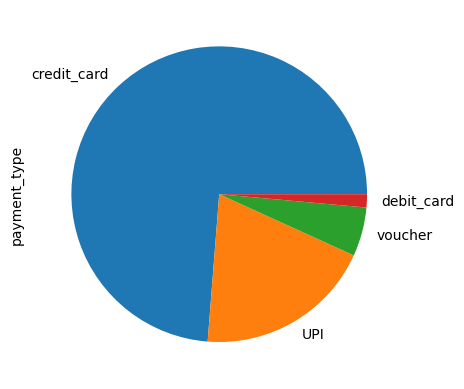

In [45]:
# 4. Payment Behaviour
# a. How customers are paying?

print('Total payment Method',df.payment_type.value_counts())
df.payment_type.value_counts().plot(kind='pie')

In [46]:
#b. Which payment channels are used by most customers?
print('most used payment channels ',df.payment_type.value_counts()[:1])

most used payment channels  credit_card    87026
Name: payment_type, dtype: int64


In [48]:
# 5. Customer satisfaction towards category & product
# a. Which categories (top 10) are maximum rated & minimum rated?

category_max_rating=df.groupby('product_category_name')['review_score'].mean()

In [49]:
#top 10 max rated
category_max_rating.sort_values(ascending=False).head(10)
#top 10 minimum rated
category_max_rating.sort_values(ascending=True).head(10)

product_category_name
Security_And_Services                2.500000
Diapers_And_Hygiene                  3.256410
Home_Comfort_2                       3.387097
Office_Furniture                     3.516274
Fashion_Male_Clothing                3.531034
Fixed_Telephony                      3.660517
Fashio_Female_Clothing               3.780000
Furniture_Mattress_And_Upholstery    3.804878
Audio                                3.823684
Construction_Tools_Safety            3.834171
Name: review_score, dtype: float64

In [51]:
# 2.Which products (top10) are maximum rated & minimum rated?

products_max_rating=df.groupby('product_id')['review_score'].mean()
#top 10 max rated product
products_max_rating.sort_values(ascending=False).head(10)
#top 10 minimum rated products
products_max_rating.sort_values(ascending=False).tail(10)

product_id
560aa6044750b7511a18e5ee9aaffa17    1.0
c3cdb28ed53f4ec5d9afe32753961641    1.0
ee8138bcca833152a19543702228ee26    1.0
19290ebcf78e385cd9fcd48ce5e1393d    1.0
c3c075d20bbf03a458eb5c4458d82380    1.0
1938ab47ef011dae9e4ced458166432e    1.0
c39610045a59ffcd596a9e9ce4341921    1.0
703655144396d09091d9280259c9e51b    1.0
703be08855ce485a358cc217d93a05d4    1.0
c7796bc610cc40ed7935b75fced0aa0e    1.0
Name: review_score, dtype: float64

In [60]:
# 3.Average rating by location, seller, product, category, month etc.

#Average rating by location
avg_location=df.groupby('customer_city')['review_score'].mean()
avg_seller=df.groupby('seller_id')['review_score'].mean()
avg_category=df.groupby('product_category_name')['review_score'].mean()
avg_product=df.groupby('product_id')['review_score'].mean()
month_wise_avg=df.groupby('month_year')['review_score'].mean()

In [79]:
#by customer 
customer_order_details=pd.merge(customer,order,on='customer_id')

In [81]:
customer_order_details['order_purchase_timestamp']=customer_order_details.order_purchase_timestamp.apply(lambda x:pd.to_datetime(x))

In [84]:
customer_order_details['order_purchase_timestamp_monthYear']=customer_order_details['order_purchase_timestamp'].dt.to_period('M')

In [86]:
customer_order_details.sort_values('order_purchase_timestamp_monthYear',ascending=True)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_monthYear
84697,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,Dholka,Gujarat,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:00,10/7/2016 13:18,10/18/2016 13:14,NaN,10/20/2016 0:00,2016-09
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,Kandukur,Andhra Pradesh,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:00,9/15/2016 12:16,11/7/2016 17:11,11/9/2016 7:47,10/4/2016 0:00,2016-09
70561,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,Tuni,Andhra Pradesh,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:00,10/7/2016 13:17,NaN,NaN,10/28/2016 0:00,2016-09
84845,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,Bobbili,Andhra Pradesh,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:00,10/7/2016 13:16,NaN,NaN,9/30/2016 0:00,2016-09
77451,cee53b7d3dd56da687a4fa61c6ce8d32,4403513209514871ac9d0fd681f7cdb5,6703,Naspur,Andhra Pradesh,1069874467b6a425853288c450f68fc9,delivered,2016-10-07 22:51:00,10/7/2016 23:13,10/11/2016 23:13,10/28/2016 13:51,11/29/2016 0:00,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50487,ead83a4f8f7be8c3034b2e98754a6147,230a1e9f42924d41f37fd22a1d4a9707,6540,Khajoori Khas,Delhi,4d59cc2a2e7bb6c0a851725f5888a9b5,canceled,2018-09-06 14:50:00,NaN,NaN,NaN,9/21/2018 0:00,2018-09
75902,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,Tallapalle,Andhra Pradesh,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:00,NaN,NaN,NaN,10/23/2018 0:00,2018-10
68312,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,Sukhrali,Haryana,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:00,NaN,NaN,NaN,10/16/2018 0:00,2018-10
85415,a4b417188addbc05b26b72d5e44837a1,87ab9fec999db8bd5774917de3cdf01c,18077,Bade Bacheli,Chhattisgarh,10a045cdf6a5650c21e9cfeb60384c16,canceled,2018-10-17 17:30:00,NaN,NaN,NaN,10/30/2018 0:00,2018-10


In [101]:
customer_order_detail_min=customer_order_details.groupby(['customer_unique_id'])[['order_purchase_timestamp_monthYear']].min()

In [102]:
customer_order_new=pd.merge(customer_order_details,customer_order_detail_min,on='customer_unique_id')

In [103]:
customer_order_new

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_monthYear_x,order_purchase_timestamp_monthYear_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,2018-04,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,2018-04,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,2018-04,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,2017-11,2017-11


In [104]:
customer_order_new["User_type"]="New"


In [105]:
customer_order_new.loc[customer_order_new['order_purchase_timestamp_monthYear_x']>customer_order_new['order_purchase_timestamp_monthYear_y'],"User_type"]="Existing"


In [106]:
customer_order_new.User_type.value_counts()

New         97418
Existing     2023
Name: User_type, dtype: int64

In [107]:
#no of existing & new customer 
customer_order_new.groupby(["order_purchase_timestamp_monthYear_x","User_type"])[["User_type"]].count()


User_type
order_purchase_timestamp_monthYear_x User_type           
2016-09                              New                4
2016-10                              New              324
2016-12                              New                1
2017-01                              Existing           1
                                     New              799
2017-02                              Existing           3
                                     New             1777
2017-03                              Existing           6
                                     New             2676
2017-04                              Existing          21
                                     New             2383
2017-05                              Existing          30
                                     New             3670
2017-06                              Existing          45
                                     New             3200
2017-07                              Existing          57
                                     New             3969
2017-08                              Existing          65
                                     New             4266
2017-09                              Existing          83
                                     New             4202
2017-10                              Existing          96
                                     New             4535
2017-11                              Existing         132
                                     New             7412
2017-12                              Existing         122
                                     New             5551
2018-01                              Existing         145
                                     New             7124
2018-02                              Existing         126
                                     New             6602
2018-03                              Existing         155
                                     New             7056
2018-04                              Existing         174
                                     New             6765
2018-05                              Existing         198
                                     New             6675
2018-06                              Existing         193
                                     New             5974
2018-07                              Existing         161
                                     New             6131
2018-08                              Existing         196
                                     New             6316
2018-09                              Existing          11
                                     New                5
2018-10                              Existing           3
                                     New                1

In [110]:
#revenue by new & existing customer
df_customer_order_items = pd.merge(left=customer_order_new,right=df,on="order_id")
df_customer_order_items

,customer_id_x,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,order_id,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,revenue,customer_revenue_segmentation,month_year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,5/30/2017 22:34,124.99,Mid Revenue,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30,2/10/2018 22:43,289.00,High Revenue,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,6/15/2018 12:10,139.94,Mid Revenue,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,4/2/2018 18:36,149.94,High Revenue,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,8/17/2018 1:59,230.00,High Revenue,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117993,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,credit_card,6,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,2018-04-14,4/28/2018 11:15,74.90,Mid Revenue,2018-04
117994,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,credit_card,3,129.06,b273b431c3aedb4eed18643309652940,5,2018-04-12,4/16/2018 10:36,114.90,Mid Revenue,2018-04
117995,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,credit_card,5,56.04,fa4f16891e6b2edd1354668d07f5648b,1,2018-05-04,5/8/2018 1:41,37.00,Low Revenue,2018-04
117996,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,credit_card,2,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,2017-11-17,11/19/2017 23:34,689.00,High Revenue,2017-11


In [112]:
df_customer_order_items.groupby(['User_type','order_purchase_timestamp_monthYear_x'])[['revenue']].sum()

revenue
User_type order_purchase_timestamp_monthYear_x            
Existing  2017-01                                    10.90
          2017-02                                   124.92
          2017-03                                   596.27
          2017-04                                  2558.83
          2017-05                                  5166.82
          2017-06                                  6369.43
          2017-07                                 11278.61
          2017-08                                 18015.26
          2017-09                                 14987.40
          2017-10                                 14855.49
          2017-11                                 20380.50
          2017-12                                 20950.68
          2018-01                                 23539.46
          2018-02                                 18130.23
          2018-03                                 25368.47
          2018-04                                 30525.33
          2018-05                                 28065.00
          2018-06                                 32083.00
          2018-07                                 24886.53
          2018-08                                 22183.18
          2018-09                                   145.00
New       2016-09                                   165.29
          2016-10                                 58151.74
          2016-12                                    10.90
          2017-01                                152114.19
          2017-02                                285347.55
          2017-03                                439049.21
          2017-04                                429467.44
          2017-05                                600622.31
          2017-06                                486258.05
          2017-07                                587533.25
          2017-08                                674339.99
          2017-09                                784383.53
          2017-10                                789157.31
          2017-11                               1198571.38
          2017-12                                823750.08
          2018-01                               1097908.56
          2018-02                               1004404.99
          2018-03                               1129638.24
          2018-04                               1134426.15
          2018-05                               1147646.61
          2018-06                                991209.40
          2018-07                               1022821.04
          2018-08                                956391.62